<a href="https://colab.research.google.com/github/ganesh2512/DSBA/blob/master/WDM_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#installing needed libraries
#! pip install --upgrade Cython
#! pip install --upgrade git+https://github.com/statsmodels/statsmodels
#import statsmodels.api as sm


#Connecting google Drive using auth
from google.colab import drive
drive.mount('/content/drive')



     |████████████████████████████████| 2.0MB 5.2MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-owepz318
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-owepz318
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+319.g77bb1d276-cp37-cp37m-linux_x86_64.whl size=17615681 sha256=2e65e6ad9012d55fca9d208425bc5f6c3751a52caf745c51620b7df2eb8482f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-tlkymhn8/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Mounted at /content

In [8]:
#Review Analysis Wordcloud and sentiment analysis

def review_analysis(data_file_path, review_collumn_name):
  import pandas as pd
  import matplotlib.pyplot as plt
  from textblob import TextBlob
  from wordcloud import WordCloud, STOPWORDS
  from nltk.corpus import stopwords
  from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer

  stop  = set(STOPWORDS)
  stop.update(["br", "href"])
  st = PorterStemmer()

  # To read a CSV file
  df = pd.read_csv(data_file_path,encoding='iso-8859-1')

  #Text PReprocessing
  df[review_collumn_name] = df[review_collumn_name].astype(str)
  df[review_collumn_name] = df[review_collumn_name].apply(lambda x: " ".join(x.lower() for x in x.split()))
  df[review_collumn_name] = df[review_collumn_name].str.replace('[^\w\s]','')
  df[review_collumn_name] = df[review_collumn_name].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  df[review_collumn_name] = df[review_collumn_name].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


  # Apply iterates the function accross the dataframe's rows
  df['polarity'] = df.apply(lambda x: TextBlob(x[review_collumn_name]).sentiment.polarity, axis=1)
  df['subjectivity'] = df.apply(lambda x: TextBlob(x[review_collumn_name]).sentiment.subjectivity, axis=1)

  #Average Sentiments
  print("\033[1m"+ "The Average Review sentiment is: " ,  'Positive' if (df['polarity'].mean()>0) else 'Negative' + "\033[1m") 

  #plotting value counts of polarity and subjectivity
  df['polarity'].value_counts().plot(kind='hist',bins=100, title='Sentiment Polarity')
  plt.show()
  df['subjectivity'].value_counts().plot(kind='hist', bins=100, title='Subjectivity')
  plt.show()
  wordcloud = WordCloud().generate(' '.join(df[review_collumn_name]))

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

The Average Review sentiment is:  Positive


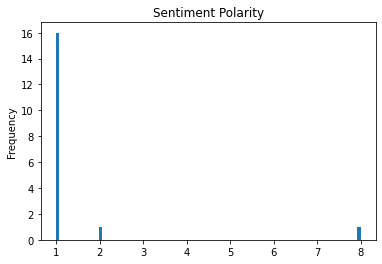

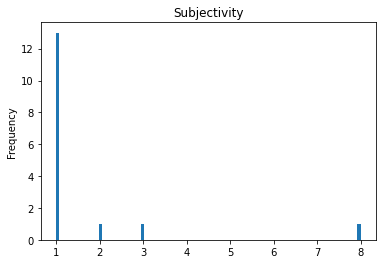

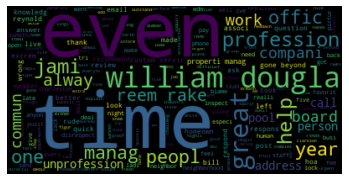

In [9]:
#Facebook Analysis
review_analysis("/content/drive/MyDrive/WDM_data/facebook_reviews.csv", 'Review')

The Average Review sentiment is:  Positive


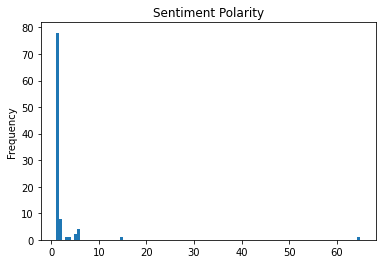

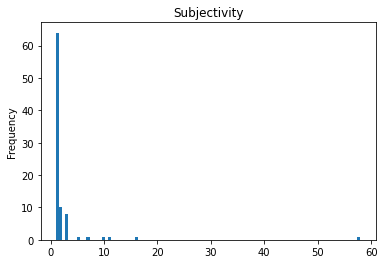

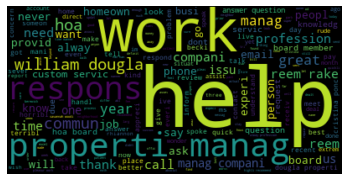

In [10]:
#Google Review Analysis
review_analysis("/content/drive/MyDrive/WDM_data/WD_Google_reviews215.csv",'review_text')

The Average Review sentiment is:  Positive


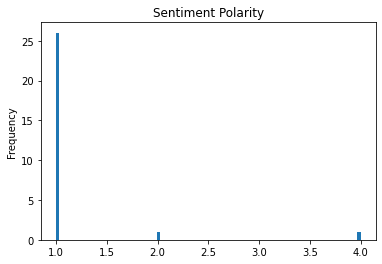

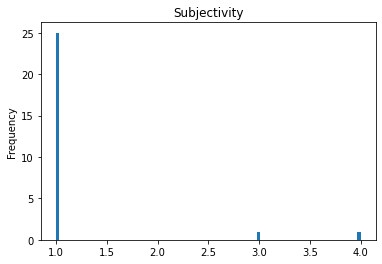

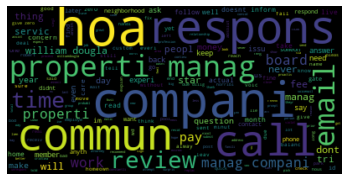

In [11]:
#Yelp Review Analysis
review_analysis("/content/drive/MyDrive/WDM_data/Yelp_reviews.csv", 'Reviews')

            Views
Date             
2017-01-23      0
2017-01-24      0
2017-01-25      0
2017-01-26      0
2017-01-27      0


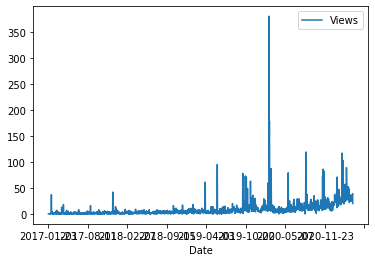

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from ipykernel import kernelapp as app


predicted=8.749917, expected=6.000000
predicted=7.746893, expected=4.000000
predicted=7.187853, expected=18.000000
predicted=11.021362, expected=10.000000
predicted=10.422574, expected=12.000000
predicted=9.598556, expected=11.000000
predicted=10.513006, expected=63.000000
predicted=27.022112, expected=28.000000
predicted=24.669950, expected=32.000000
predicted=26.744608, expected=15.000000
predicted=27.591490, expected=9.000000
predicted=29.714232, expected=9.000000
predicted=18.182357, expected=20.000000
predicted=18.711344, expected=5.000000
predicted=11.319437, expected=29.000000
predicted=15.292580, expected=11.000000
predicted=14.898440, expected=9.000000
predicted=13.668224, expected=5.000000
predicted=10.668580, expected=7.000000
predicted=12.712454, expected=36.000000
predicted=16.381476, expected=6.000000
predicted=12.415835, expected=5.000000
predicted=9.173464, expected=10.000000
predicted=12.408067, expected=14.000000
predicted=16.209998, expected=5.000000
predicted=7.5296

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=113.896680, expected=178.000000
predicted=75.165207, expected=82.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=224.236129, expected=7.000000
predicted=186.817558, expected=18.000000
predicted=53.225412, expected=41.000000
predicted=67.741199, expected=9.000000
predicted=32.158799, expected=17.000000
predicted=12.329408, expected=5.000000
predicted=14.480377, expected=87.000000
predicted=45.808885, expected=68.000000
predicted=60.792677, expected=20.000000
predicted=31.997741, expected=14.000000
predicted=21.023084, expected=14.000000
predicted=32.578781, expected=15.000000
predicted=24.464982, expected=10.000000
predicted=13.647585, expected=14.000000
predicted=12.741063, expected=17.000000
predicted=15.506956, expected=16.000000
predicted=15.585719, expected=4.000000
predicted=9.617921, expected=11.000000
predicted=9.850882, expected=2.000000
predicted=8.848660, expected=14.000000
predicted=9.571684, expected=6.000000
predicted=8.821377, expected=14.000000
predicted=9.705432, expected=12.000000
predicted=11.293910, expected=2.000000
predicted=7.393642, expected=4.000000
predicted=4.6

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=13.575359, expected=25.000000
predicted=19.417963, expected=11.000000
predicted=14.020670, expected=5.000000
predicted=8.521278, expected=1.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=7.173528, expected=13.000000
predicted=11.550619, expected=16.000000
predicted=13.321815, expected=7.000000
predicted=8.540826, expected=15.000000
predicted=10.049274, expected=17.000000
predicted=15.772339, expected=17.000000
predicted=15.821641, expected=27.000000
predicted=19.532406, expected=14.000000
predicted=18.221905, expected=16.000000
predicted=15.597243, expected=23.000000
predicted=20.503147, expected=24.000000
predicted=23.320079, expected=14.000000
predicted=17.003537, expected=12.000000
predicted=14.312538, expected=6.000000
predicted=12.505777, expected=8.000000
predicted=10.813964, expected=16.000000
predicted=13.079171, expected=16.000000
predicted=14.371999, expected=12.000000
predicted=11.649600, expected=13.000000
predicted=12.140450, expected=11.000000
predicted=12.981926, expected=13.000000
predicted=12.865655, expected=12.000000
predicted=12.424965, expected=27.000000
predicted=18.770966, expected=20.000000
predicted=19.833166, expected=24.000000
predi

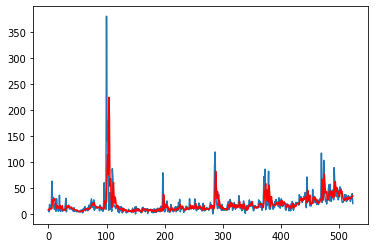

In [19]:
#Time Series Analysis Just a sample
import pandas as pd
import matplotlib.pyplot as plt
data_file_path = "/content/drive/MyDrive/WDM_data/TotalViews.csv"
series = pd.read_csv(data_file_path,encoding='iso-8859-1', index_col='Date')
print(series.head())
series.plot()
plt.show()




# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,2,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [2]:
#Finding best hyper parameters for ARIMA model for given data
import warnings
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
#warnings.filterwarnings("ignore")
series = pd.read_csv(data_file_path,encoding='iso-8859-1', index_col='Date')
evaluate_models(series.values, p_values, d_values, q_values)

NameError: ignored